In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv('1.01. Simple linear regression.csv')

In [3]:
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [5]:
#creating the regression model. GPA--dependent variable/feature. It is being predicted using SAT, which is an independent variable/feature
x=data['SAT']
y=data['GPA']
#x is called input or feature
#y is called output or target


In [6]:
#check the shape of input and target. They are both vectors of length 84
x.shape

(84,)

In [7]:
y.shape

(84,)

In [8]:
#sklearn makes very good use of the object oriented capability of Python
#creating an instance of the LinearRegression class
reg=LinearRegression()
#fit the regression. NOte the order of mentioning x and y. here order is important. IN statsmodels it doesnt make any difference
reg.fit(x,y)
#the above statement throws an error. Sklearn requires 2D array whereas we are providing 1-d array. YOu can see using the x.shape , that x is a vector and has a single dimension, length.
#we have to reshape it to a matrix.

ValueError: Expected 2D array, got 1D array instead:
array=[1714 1664 1760 1685 1693 1670 1764 1764 1792 1850 1735 1775 1735 1712
 1773 1872 1755 1674 1842 1786 1761 1722 1663 1687 1974 1826 1787 1821
 2020 1794 1769 1934 1775 1855 1880 1849 1808 1954 1777 1831 1865 1850
 1966 1702 1990 1925 1824 1956 1857 1979 1802 1855 1907 1634 1879 1887
 1730 1953 1781 1891 1964 1808 1893 2041 1893 1832 1850 1934 1861 1931
 1933 1778 1975 1934 2021 2015 1997 2020 1843 1936 1810 1987 1962 2050].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [9]:
#reshaping from 1-d array of length 84 to a 2-d array 84 cross 1
x_matrix=x.values.reshape(84,1)
#alternatively, we can use the suggestion from sklearn itself(observe the last few lines of the error obtained in the previous cell), i.e. use array.reshape(-1,1)
x_matrix=x.values.reshape(-1,1)

In [10]:
x_matrix.shape

(84, 1)

In [11]:
#lets run the regression with the reshaped feature
reg.fit(x_matrix,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
#focussing on the parameters of LinearRegression
#Standardization--(x-mu)/sigma
#Normalization--(x-mu)/L2-Norm of the inputs
# http://www.chioka.in/differences-between-the-l1-norm-and-the-l2-norm-least-absolute-deviations-and-least-squares/
# https://en.wikipedia.org/wiki/Feature_scaling

#copy_x=True- copies the inputs before fitting them. Its a safety net against normalizations and other transformations that can be done by sklearn while creating an algorithm.Similar to creating copies of dataframe
#fit_intercept=True- In statsmodels we had to manually add a constant. the fit_intercept parameter takes care precisely of that. If you dont want an intercept you can just set it to false
#n_jobs=1--used to parallelize routines.1 refers to the number of CPU being used. If the data set is extremely big and you want to use the power of parallel processing you can mention the values as 2,3,4 or 5, provided you have more than 1 CPU available


In [12]:
#getting R-squared--use the method reg.score(x,y)--this returns the R-squared of a Linear Regression
reg.score(x_matrix,y)

0.40600391479679765

In [13]:
#to figure out the coefficients:
reg.coef_
#reg.coef_ returns an array of coefficients depending upon the number features used. Here we are just using SAT, so coeff of SAT is returned which is equal to 0.0017(round off value)

array([0.00165569])

In [14]:
#obtaining the intercept
reg.intercept_

0.275040299660279

In [15]:
#Making Predictions:
#use reg.predict(new_inputs)--returns the predictions of the linear regression model for some new inputs
reg.predict(1740)
#so here we passed the SAT score and the model predicts the GPA score as 3.155, and also this result, is an array, because the predict method can take more than a single value

array([3.15593751])

In [16]:
#passing dataframe to predict()
new_data=pd.DataFrame([1740,1780],columns=['SAT'])
new_data

,SAT
0,1740
1,1780


In [17]:
reg.predict(new_data)

array([3.15593751, 3.22216503])

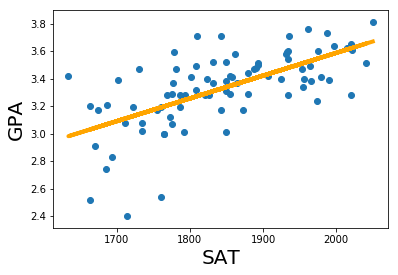

In [18]:
#plotting the regression line on the scatter plot obtained from the previous step
plt.scatter(x,y)
yhat=reg.coef_*x_matrix+reg.intercept_
#yhat=0.0017*x + 0.2750
# Plot the regression line against the independent variable (SAT)
fig=plt.plot(x,yhat,lw=4,c='orange',label='regression line')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()

# Multiple Linear Regression

In [19]:
data=pd.read_csv('1.02. Multiple linear regression.csv')

In [20]:
data.head()
#2 input features--SAT and Rand 1,2,3

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2


In [21]:
data.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


In [22]:
#we already know that SAT score is a good predictor of GPA. Rand1,2,3 randomly assigned 1,2 or 3 to the samples. Sample is the machine learning term for observations
x=data[['SAT','Rand 1,2,3']]
y=data['GPA']

In [23]:
reg=LinearRegression()

In [24]:
reg.fit(x,y)
#Notice that this runs without any error. sklearn is optimized for multiple inputs, so we are getting a 2-d array over here as compared to the previous one where we had to reshape the input feature

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
reg.coef_

array([ 0.00165354, -0.00826982])

In [26]:
reg.intercept_

0.29603261264909353

# Calculating the R-squared

In [27]:
reg.score(x,y)

0.40668119528142815

In [ ]:
#the adjusted r-squared is a better explanation for the model. If we are using features with low or no explanatory powers, theR-square will increase. So the execessive usageof independent variables/features is penalized by making use of adjusted r-squared
#there is no specific function which can be directly used for calculating adj r-squared so we create our own

### formula for adjusted r-squared
$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [ ]:
#as per the formula, n= no of observations(84) and p=no of predictors(2)

In [28]:
x.shape

(84, 2)

In [29]:
#lets try to create this adj r-squared measure on our own
r2=reg.score(x,y)
#n=84 so we will use n=x.shape[0] which will extract 84. similarly for p--x.shape[1]
n=x.shape[0]
p=x.shape[1]
adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.39203134825134

In [ ]:
#compare it with the previous multiple linear regression with stastmodels example. the value for adj r-squared will be 0.392
#so adjusted r-squared<r-squared. Thus one or more perdictors have little or no explanatory power.
#so now we have to identify which one has no predictive power and thus remove it. This process of identifying features which have little or no predictive power is known as FEATURE SELECTION WITH F-REGRESSION
#Feature Selection simplifies models
#When we used statsmodels we identified the features using p-value. If a variable has p-value>0.05, we can disregard it
#next lets try to find out the p-values using sklearn

In [ ]:
#sklearn makes use of f_regression. F-regression creates simple linear regressions of each feature and the dependent variable
#here we will have GPA vs SAT and GPA vs Rand 1,2,3. Then the method will calculate the F-stats for each of those regression and return the p-value.
#If there were 50 features, 50 linear regressions will be created
#For a simple linear regression, the p-value of the F-stats coincides with the p-value of the only independent variable


## Feature selection

In [30]:
from sklearn.feature_selection import f_regression

In [31]:
f_regression(x,y)
#in the output, the first array contains the F-stats for each regressions and the 2nd array consists of the corresponding p-values

(array([56.04804786,  0.17558437]), array([7.19951844e-11, 6.76291372e-01]))

In [32]:
p_values=f_regression(x,y)[1]
p_values

array([7.19951844e-11, 6.76291372e-01])

In [33]:
#using round() to round to 3 decimal digits
p_values.round(3)

array([0.   , 0.676])

## if p-value is >0.05, we disregard the feature/variable

In [ ]:
#the 1st value refers to the 1st column of x(x=data(['SAT','Rand 1,2,3'])) and the 2nd refers to the second column

## Creating a Summary Table

In [34]:
reg_summary=pd.DataFrame(['SAT','Rand 1,2,3'],columns=['Features'])
#if we want to parameterize the above code we can go ahead and use this code:
#pd.DataFrame(data=x.columns.values,columns=['Features'])
#so instead of providing every feature name we just made use of x.columns.values. this saves time when have lot of features

In [35]:
reg_summary

,Features
0,SAT
1,"Rand 1,2,3"


In [36]:
reg_summary['Coefficients']=reg.coef_
reg_summary['p-values']=p_values.round(3)

In [37]:
reg_summary

,Features,Coefficients,p-values
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.676


## Feature Scaling

In [ ]:
# The most common problem in working with numerical data is the difference in magnitudes.
#An easy fix for this issue is standardization also known as feature scaling or normalization. We will stick to the terms standardization and feature scaling
#Standardization/Feature Scaling-process of transforming the data we are working with into a standard scale.
#Z=(x-mu)/sigma
#Example if we have trading data having 2 columns, 'European Dollar Exchange Rate' and 'Daily trading volume' with the data for both colums as follow:
# EDER    DailyTradingVolume
# 1.3     110000
# 1.34    98700
# 1.25    135000
#the scale is extremely different. So we go ahead and use the Standardizing variable Z, with mean and std deviation of each column
#The standardized data set:
# EDER    DailyTradingVolume
# 0.07     -0.25
# 0.96    -0.85
# -1.03    1.1

In [38]:
x=data[['SAT','Rand 1,2,3']]
y=data['GPA']

In [39]:
#We will use the StandardScaler() module(a preprocessing module used to standardize/scale data) from sklearn
from sklearn.preprocessing import StandardScaler

In [40]:
scaler=StandardScaler()
#the scaler object which we created just now, will be used to scale our data. In other words it will subtract the mean and divide by standard deviation from each feature point

In [41]:
#fit the input data
scaler.fit(x)
#this line of code calculates the mean and standard deviation of each feature and stores them in the scaler object

StandardScaler(copy=True, with_mean=True, with_std=True)

In [42]:
#we created the scaler object and it has mean and standard deviation of feacture. But the inputs are still unscaled. SO to transform the inputs we go ahead and use:
#StandardScaler.transform(x)--transofrms the unscaled inputs using the information contained in the scaler object. This is where each feature point goes through scaling(subtract the mean and divide by std deviation)
#whenever we get new data we can just go ahead and apply scaler.transform(new_data)
x_scaled=scaler.transform(x)
x_scaled
#we get the scaled/standardized inputs

array([[-1.26338288, -1.24637147],
       [-1.74458431,  1.10632974],
       [-0.82067757,  1.10632974],
       [-1.54247971,  1.10632974],
       [-1.46548748, -0.07002087],
       [-1.68684014, -1.24637147],
       [-0.78218146, -0.07002087],
       [-0.78218146, -1.24637147],
       [-0.51270866, -0.07002087],
       [ 0.04548499,  1.10632974],
       [-1.06127829,  1.10632974],
       [-0.67631715, -0.07002087],
       [-1.06127829, -1.24637147],
       [-1.28263094,  1.10632974],
       [-0.6955652 , -0.07002087],
       [ 0.25721362, -0.07002087],
       [-0.86879772,  1.10632974],
       [-1.64834403, -0.07002087],
       [-0.03150724,  1.10632974],
       [-0.57045283,  1.10632974],
       [-0.81105355,  1.10632974],
       [-1.18639066,  1.10632974],
       [-1.75420834,  1.10632974],
       [-1.52323165, -1.24637147],
       [ 1.23886453, -1.24637147],
       [-0.18549169, -1.24637147],
       [-0.5608288 , -1.24637147],
       [-0.23361183,  1.10632974],
       [ 1.68156984,

In [43]:
#we did this scaling because SAT score was in the range 600 to 2400 and Rand 1,2,3 in the range 1-3
#if all the features have the same magnitude allows us to compare their impact
#Creating new Regression with the scaled inputs:
reg=LinearRegression()
reg.fit(x_scaled,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
reg.coef_

array([ 0.17181389, -0.00703007])

In [45]:
reg.intercept_

3.330238095238095

In [46]:
#Creating a summary table
reg_summary=pd.DataFrame([['Intercept'],['SAT'],['Rand 1,2,3']],columns=['Features'])
reg_summary['Weights']=reg.intercept_,reg.coef_[0],reg.coef_[1]

In [47]:
reg_summary
#Weights is the ML term for standardized coefficients
#The bigger the weight the bigger is the impact of the feature on the regression
#Similarly in ML the intercept is called BIAS. Intercept is nothing but a number which adjusts the regression with some constant. However if we need ot adjust our regression with some bias then the regresssion is biased by that number
#So go ahead and repeat the same code as above..just mention Bias instead of Intercept

,Features,Weights
0,Intercept,3.330238
1,SAT,0.171814
2,"Rand 1,2,3",-0.007030


In [48]:
reg_summary=pd.DataFrame([['Bias'],['SAT'],['Rand 1,2,3']],columns=['Features'])
reg_summary['Weights']=reg.intercept_,reg.coef_[0],reg.coef_[1]

In [49]:
reg_summary

,Features,Weights
0,Bias,3.330238
1,SAT,0.171814
2,"Rand 1,2,3",-0.007030


In [ ]:
#the closer the weight is to 0 the smaller the implact and vice-versa. Observe that the weight of SAT is 0.17 which is much bigger than the weight of Rand 1,2,3
#So Rand 1,2,3 barely contributes to the model. SO we can remove it or let it be
#The worst performing features have a lower p value

## Making Predcitions with the standardized coefficients(Weights)

In [50]:
#taking random data here
raw_data=pd.DataFrame(data=[[1700,2],[1800,1]],columns=['SAT','Rand 1,2,3'])

In [51]:
raw_data

,SAT,"Rand 1,2,3"
0,1700,2
1,1800,1


In [52]:
#call the predict method and pass the new input as arguments
reg.predict(raw_data)
#the output is quite confusing. 312 is not a valid GPA!This happened because our model was trained on standardized inputs. Here we have provided inputs which are not standadrized.Observe the scale difference between SAT and Rand 1,2,3 values
#Our model expects values that are of the same magnitude like the ones used in the training process

array([295.39979563, 312.58821497])

In [53]:
#So the new dataframe--raw_data, must be prepared and standardized in the same way as the input X, with the same mean and std deviation
#the mean and standard deviation is stored in the scaler object
new_data_scaled=scaler.transform(raw_data)

In [54]:
new_data_scaled

array([[-1.39811928, -0.07002087],
       [-0.43571643, -1.24637147]])

In [55]:
x_scaled
#observe that new_data_scaled and x_scaled(using which we trained the model) looks the same

array([[-1.26338288, -1.24637147],
       [-1.74458431,  1.10632974],
       [-0.82067757,  1.10632974],
       [-1.54247971,  1.10632974],
       [-1.46548748, -0.07002087],
       [-1.68684014, -1.24637147],
       [-0.78218146, -0.07002087],
       [-0.78218146, -1.24637147],
       [-0.51270866, -0.07002087],
       [ 0.04548499,  1.10632974],
       [-1.06127829,  1.10632974],
       [-0.67631715, -0.07002087],
       [-1.06127829, -1.24637147],
       [-1.28263094,  1.10632974],
       [-0.6955652 , -0.07002087],
       [ 0.25721362, -0.07002087],
       [-0.86879772,  1.10632974],
       [-1.64834403, -0.07002087],
       [-0.03150724,  1.10632974],
       [-0.57045283,  1.10632974],
       [-0.81105355,  1.10632974],
       [-1.18639066,  1.10632974],
       [-1.75420834,  1.10632974],
       [-1.52323165, -1.24637147],
       [ 1.23886453, -1.24637147],
       [-0.18549169, -1.24637147],
       [-0.5608288 , -1.24637147],
       [-0.23361183,  1.10632974],
       [ 1.68156984,

In [56]:
reg.predict(new_data_scaled)
#so student1 gets a predicted GPA of 3.09 and student2--3.24

array([3.09051403, 3.26413803])

In [ ]:
##What if we removed the Rand 1,2,3 feature? As per the theory nothing should change.Try it out
